In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

In [3]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
features = pd.read_pickle(PATH+"imputed_dataset.pkl")

In [4]:
features_of_interest = list(set(list(features.columns)) - set(['acc.overall.avg']))

Y = features['acc.overall.avg']
X = features[features_of_interest]

In [5]:
# identify the categorical features
categorical_features = []
for columns in list(X.columns):
    if features[columns].dtype=='object':
        categorical_features.append(columns)
numeric_features = list(set(features_of_interest) - set(categorical_features))

In [6]:
# Encode the categorical variables
X_enc = pd.get_dummies(X, columns=categorical_features)
Y = Y.to_numpy()

In [7]:
# Split into training and testing, 70:20:10
X_train, X_test, y_train, y_test = train_test_split(X_enc, Y, test_size=0.3)

In [8]:
# Split into training and validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.1/(0.1 + 0.2))

In [9]:
print("Shape of training set:", X_train.shape)
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (69589, 1126)
Shape of validation set: (19882, 1126)
Shape of test set: (9942, 1126)


In [10]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_features])
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [11]:
pca = PCA(n_components=30)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_val)
X_pca_test = pca.transform(X_test)

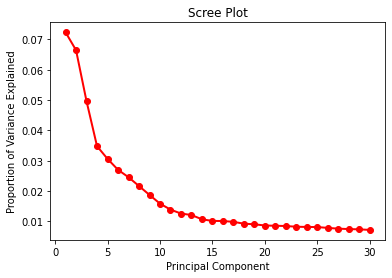

In [12]:
# Scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [13]:
# Select top 15 principal components
pca = PCA(n_components=15)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_val)
X_pca_test = pca.transform(X_test)

In [14]:
with open('/cdtshared/wearables/students/group5/XtrainPCA.pkl','wb') as f:
    pickle.dump(X_pca_train, f)
with open('/cdtshared/wearables/students/group5/XvalPCA.pkl','wb') as f:
    pickle.dump(X_pca_val, f)
with open('/cdtshared/wearables/students/group5/XtestPCA.pkl','wb') as f:
    pickle.dump(X_pca_test, f)
with open('/cdtshared/wearables/students/group5/ytrainPCA.pkl','wb') as f:
    pickle.dump(y_train, f)
with open('/cdtshared/wearables/students/group5/yvalPCA.pkl','wb') as f:
    pickle.dump(y_val, f)
with open('/cdtshared/wearables/students/group5/ytestPCA.pkl','wb') as f:
    pickle.dump(y_test, f)

PermissionError: [Errno 13] Permission denied: '/cdtshared/wearables/students/group5/XtrainPCA.pkl'

In [15]:
PC1 = X_pca_train[:,0]
PC2 = X_pca_train[:,1]

In [16]:
PC1.shape

(69589,)

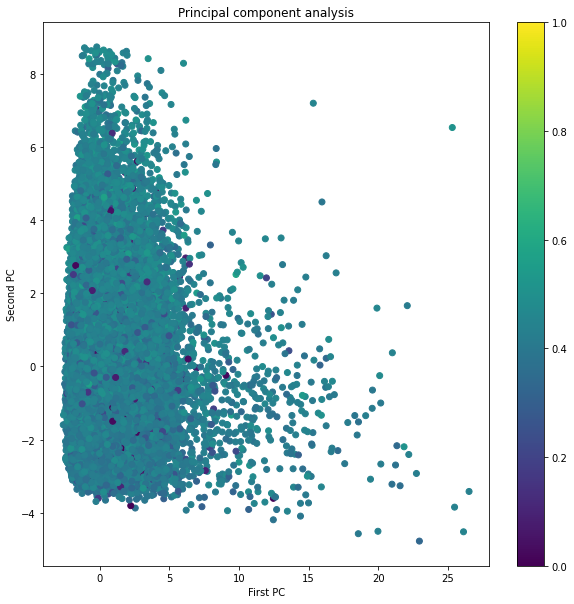

In [17]:
y_trans = np.log(1+y_train)
y_trans = y_trans / np.max(y_trans)
plt.figure(figsize=(10,10))
plt.scatter(PC1,PC2,c=y_trans)
plt.title("Principal component analysis")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.colorbar()
plt.show()